<a href="https://colab.research.google.com/github/rmmsia/sneakerclassification/blob/main/Adidas_Nike_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install opendatasets

import os
import opendatasets as od
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


print(tf.version.VERSION)

2.15.0


In [12]:
od.download('https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset')

Skipping, found downloaded files in "./nike-adidas-shoes-for-image-classification-dataset" (use force=True to force download)


In [13]:
base_dir = './nike-adidas-shoes-for-image-classification-dataset/'
batch_size = 32

train_path = '/content/nike-adidas-shoes-for-image-classification-dataset/train'
valid_path = '/content/nike-adidas-shoes-for-image-classification-dataset/validation'
test_path = '/content/nike-adidas-shoes-for-image-classification-dataset/test'

In [14]:
datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.2,
    rotation_range=30,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    subset="training",
    class_mode='categorical',
    batch_size=batch_size
)

valid_gen = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=(batch_size),
    subset='training',
    class_mode='categorical'
)

# For test data
test_gen = ImageDataGenerator(rescale=1/255.).flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for test data
)

Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


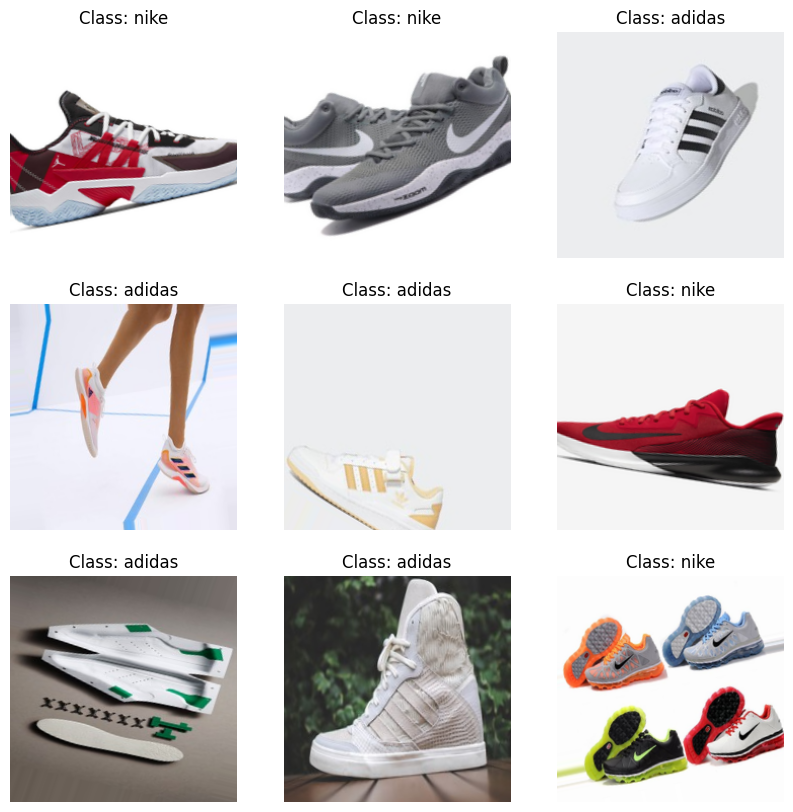

In [15]:
import numpy as np

# Assuming you have a list of class names
class_names = ['adidas', 'nike']

sample_images, sample_labels = train_gen.next()

# Get the index of the maximum value in each one-hot encoded label
class_indices = np.argmax(sample_labels, axis=1)

# Map the indices to class names
class_labels = [class_names[i] for i in class_indices]

# Visualize some sample images from train_gen with class names
plt.figure(figsize=(10, 10))
for i in range(9):  # Change 9 to the number of images you want to visualize
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title('Class: {}'.format(class_labels[i]))
    plt.axis('off')
plt.show()


In [16]:
class_count = len(list(train_gen.class_indices.keys()))
print(class_count)

2


In [35]:
'''
Create a NN with 1 input layer
1 conv layer, 32 filters, each filter size as 5x5, stride = (1, 1) activation function reLU
1 pool with size = (2,2), stride = (2, 2)
1 conv layer, 64 filters, each filter size as 5x5, stride = (1, 1) activation function reLU
1 pool with size = (2,2), stride = (2, 2)
1 Dense layer with 500 nodes, activation = relu
1 softmax output layer with 10 outputs (interpreted as probabilites over 10 classes)
'''

model = tf.keras.Sequential()

# modify starting here. neural network architecture

model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(224, 224, 3)))

# 32 filters, 5x5 filter size, stride 1. each filter corresponds to each weight.

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(500, activation='relu'))
# end of architecture
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 64)      102464    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 179776)            0         
                                                                 
 dense_4 (Dense)             (None, 500)              

In [36]:
# Compile the model with appropriate Loss function
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Run the stochastic gradient descent for specified epochs
epochs = 100
model.fit(train_gen, epochs=epochs, validation_data = valid_gen)

Epoch 1/100
 4/15 [=======>......................] - ETA: 3s - loss: 16.6946 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 8s 445ms/step - loss: 5.1725 - accuracy: 0.4935 - val_loss: 0.6939 - val_accuracy: 0.5455
Epoch 2/100
15/15 [==============================] - 7s 493ms/step - loss: 0.6936 - accuracy: 0.4913 - val_loss: 0.6929 - val_accuracy: 0.5091
Epoch 3/100
15/15 [==============================] - 7s 492ms/step - loss: 0.6934 - accuracy: 0.4739 - val_loss: 0.6930 - val_accuracy: 0.5091
Epoch 4/100
15/15 [==============================] - 6s 427ms/step - loss: 0.6929 - accuracy: 0.5239 - val_loss: 0.6932 - val_accuracy: 0.4545
Epoch 5/100
15/15 [==============================] - 7s 491ms/step - loss: 0.6998 - accuracy: 0.5717 - val_loss: 0.6938 - val_accuracy: 0.4909
Epoch 6/100
15/15 [==============================] - 7s 440ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4909
Epoch 7/100
15/15 [==============================] - 6s 424ms/step - loss: 0.6935 - accuracy: 0.5022 - val_loss: 0.6914 - val_accuracy: 0.5273
Epoch 8/100

In [38]:
train_score = model.evaluate(train_gen, steps= len(train_gen), verbose= 1)
valid_score = model.evaluate(valid_gen, steps= len(valid_gen), verbose= 1)
test_score = model.evaluate(test_gen, steps= len(test_gen), verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 0s 244ms/step - loss: 0.9337 - accuracy: 0.7000
Train Loss:  0.3199777901172638
Train Accuracy:  0.8695651888847351
--------------------
Validation Loss:  1.0685622692108154
Validation Accuracy:  0.6909090876579285
--------------------
Test Loss:  0.9336715936660767
Test Accuracy:  0.699999988079071


In [39]:
predictions = model.predict(test_gen)
predictions.shape

1/1 [==============================] - 0s 256ms/step


(60, 2)

In [40]:
predictions[0]

array([0.64543027, 0.3545697 ], dtype=float32)

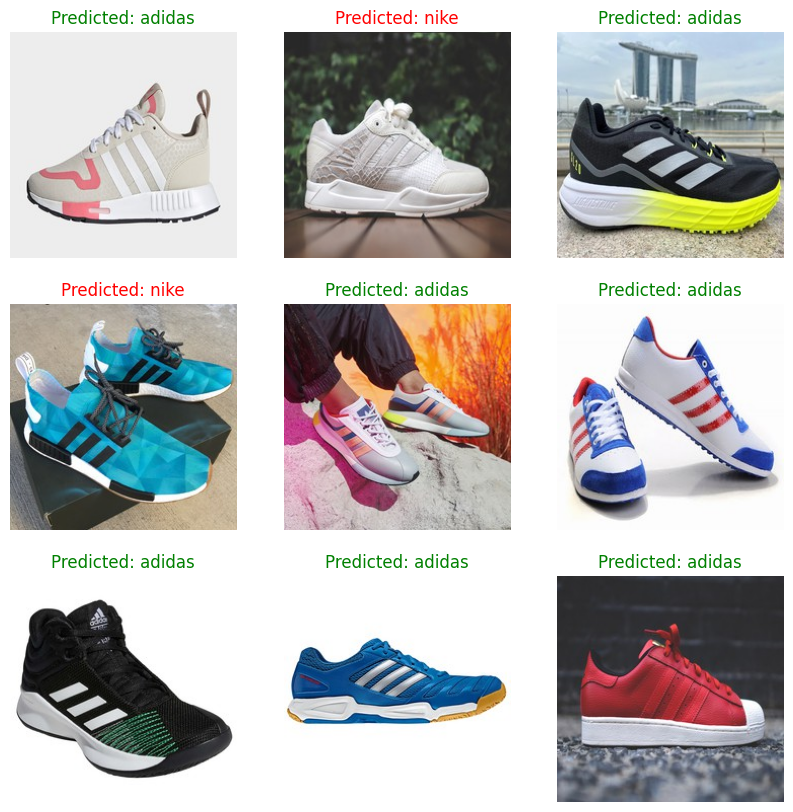

In [46]:
predicted_class_indices = np.argmax(predictions, axis=1)

# Map predicted class indices to class names
predicted_class_labels = [class_names[i] for i in predicted_class_indices]

# Visualize test images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):  # Change 9 to the number of images you want to visualize
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    if predicted_class_labels[i] == test_class_labels[i]:
        label_color = 'green'  # Correct prediction
    else:
        label_color = 'red'  # Incorrect prediction
    plt.title('Predicted: {}'.format(predicted_class_labels[i]), color=label_color)
    plt.axis('off')
plt.show()